In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

In [3]:
#unconstrained_path = 'throughput.results.local/not-constrained-4k.json'
unconstrained_path = 'throughput.results.local/not-constrained-4k.1.json'
constrained_path = 'throughput.results.local/constrained-4k.json'

# timings list in timings.timings

In [4]:
# TODO add number of prompt tokens as a starting point.
# TODO ensure to count also the first token after the prompt. 

In [23]:
# Load timings
def load_timings(path):
    with open(path, 'r') as f:
        data = json.load(f)
        return data['timings']['timings']

# Load both sets
window_size = 10
timings_unconstrained = moving_average(load_timings(unconstrained_path), window_size)
timings_constrained = moving_average(load_timings(constrained_path), window_size)

# Assume context lengths are same for both and just linearly increasing
context_lengths = list(range(len(timings_unconstrained)))


In [24]:
# quantiles
np.quantile(timings_unconstrained, 0.75)

np.float64(0.08664834499359131)

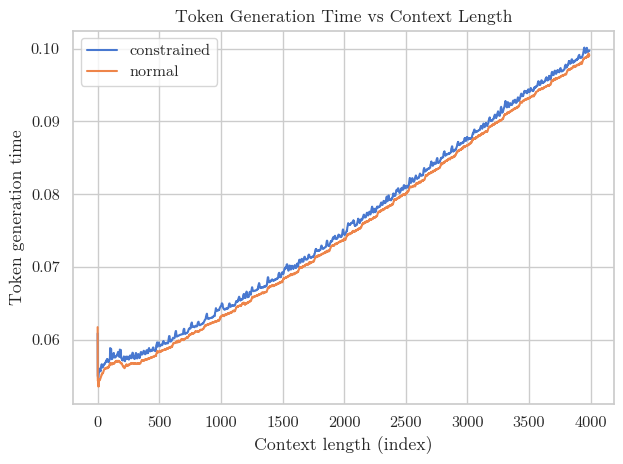

In [25]:
# Plot
plt.plot(context_lengths, timings_constrained, label='constrained')
plt.plot(context_lengths, timings_unconstrained, label='normal')

plt.xlabel("Context length (index)")
plt.ylabel("Token generation time")
plt.title("Token Generation Time vs Context Length")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

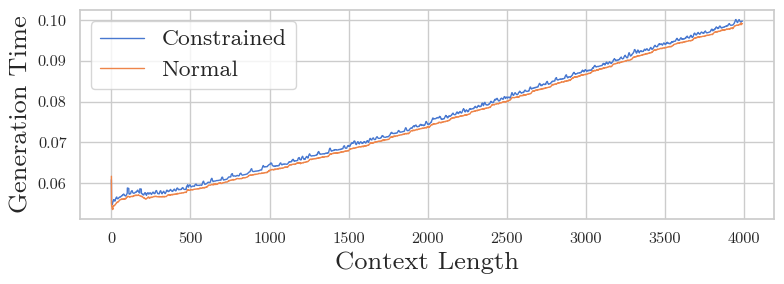

In [26]:
# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

plt.rcParams['font.family'] = 'Latin Modern Roman'

# Create a figure with a rectangular shape
plt.figure(figsize=(8, 3))  # Width = 10, Height = 6 (rectangular)

# Plot data
plt.plot(context_lengths, timings_constrained, label='Constrained', linewidth=1)
plt.plot(context_lengths, timings_unconstrained, label='Normal', linewidth=1)

# Add labels and title
plt.xlabel("Context Length", fontsize=18)
plt.ylabel("Generation Time", fontsize=18)
plt.title("", fontsize=20)

# Add legend
plt.legend(fontsize=16)

# Enable grid
plt.grid(True)

# Make the layout tight (prevents cutting off parts of the figure)
plt.tight_layout()

# Save the plot as a zoomable PDF (vector graphic format)
plt.savefig("token_generation_time_vs_context_length.pdf", format="pdf")

# Show the plot
plt.show()


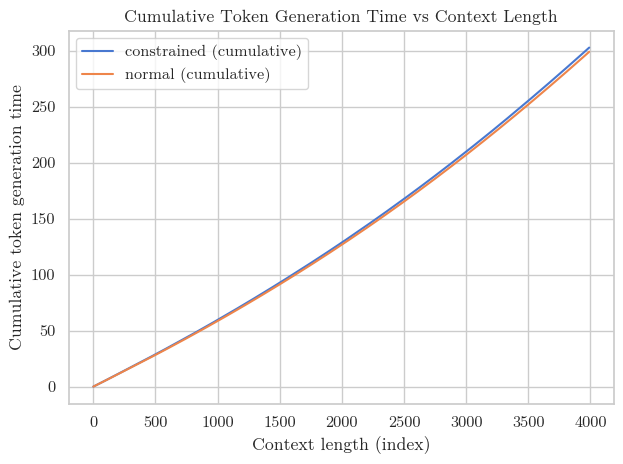

In [27]:
# Cumulative sums
cumulative_unconstrained = np.cumsum(timings_unconstrained)
cumulative_constrained = np.cumsum(timings_constrained)

#cumulative_constrained = cumulative_constrained - cumulative_unconstrained
#cumulative_unconstrained = cumulative_unconstrained - cumulative_unconstrained

# Assume context lengths increase with index
context_lengths = list(range(len(timings_unconstrained)))

# Plot cumulative timings
plt.plot(context_lengths, cumulative_constrained, label='constrained (cumulative)')
plt.plot(context_lengths, cumulative_unconstrained, label='normal (cumulative)')

plt.xlabel("Context length (index)")
plt.ylabel("Cumulative token generation time")
plt.title("Cumulative Token Generation Time vs Context Length")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

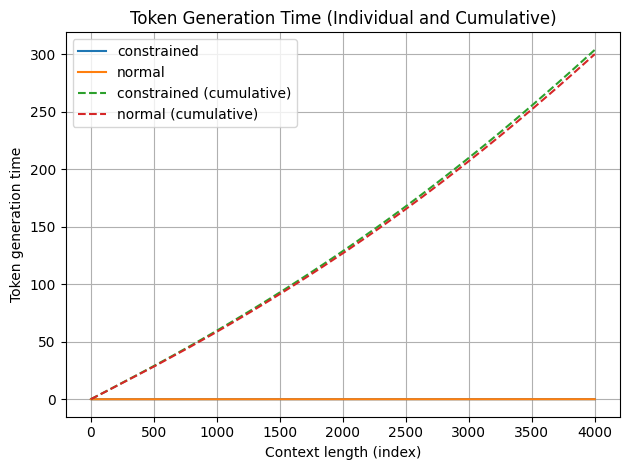

In [28]:
# Plot everything
plt.plot(context_lengths, timings_constrained, label='constrained', linestyle='-')
plt.plot(context_lengths, timings_unconstrained, label='normal', linestyle='-')

plt.plot(context_lengths, cumulative_constrained, label='constrained (cumulative)', linestyle='--')
plt.plot(context_lengths, cumulative_unconstrained, label='normal (cumulative)', linestyle='--')

plt.xlabel("Context length (index)")
plt.ylabel("Token generation time")
plt.title("Token Generation Time (Individual and Cumulative)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


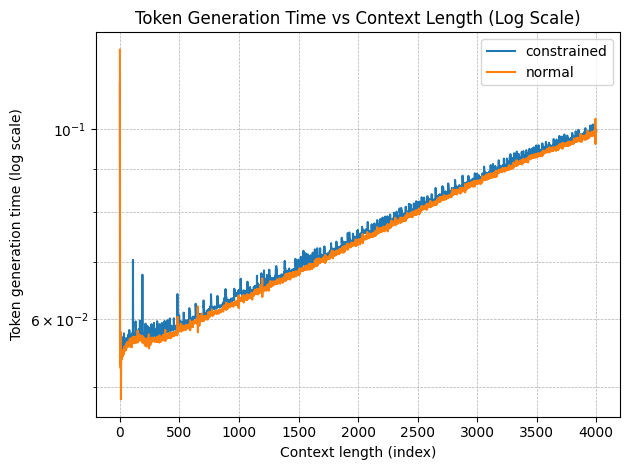

In [29]:
# Plot without markers, log scale on y-axis
plt.plot(context_lengths, timings_constrained, label='constrained')
plt.plot(context_lengths, timings_unconstrained, label='normal')

plt.xlabel("Context length (index)")
plt.ylabel("Token generation time (log scale)")
plt.yscale('log')  # Set y-axis to log scale
plt.title("Token Generation Time vs Context Length (Log Scale)")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


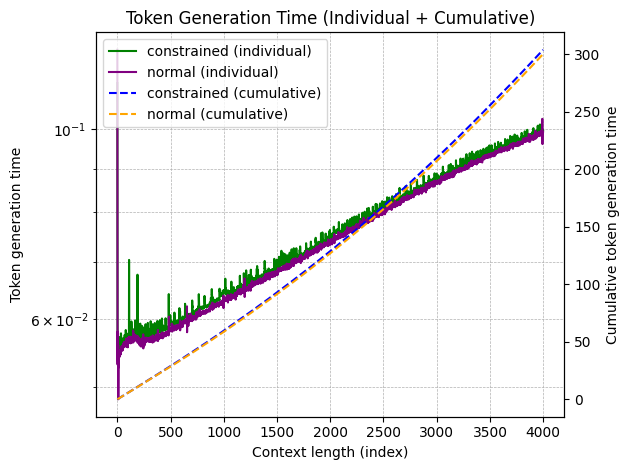

In [30]:
# Create figure and axes
fig, ax1 = plt.subplots()

# Plot individual timings on ax1 (left y-axis, log scale)
ax1.plot(context_lengths, timings_constrained, label='constrained (individual)', color='green')
ax1.plot(context_lengths, timings_unconstrained, label='normal (individual)', color='purple')
ax1.set_xlabel("Context length (index)")
ax1.set_ylabel("Token generation time", color='black')
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot cumulative timings on ax2 (right y-axis, linear scale)
ax2.plot(context_lengths, cumulative_constrained, label='constrained (cumulative)', color='blue', linestyle='--')
ax2.plot(context_lengths, cumulative_unconstrained, label='normal (cumulative)', color='orange', linestyle='--')
ax2.set_ylabel("Cumulative token generation time", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title("Token Generation Time (Individual + Cumulative)")
plt.tight_layout()
plt.show()